In [1]:
%cd ../

/Users/origenolet/Desktop/Ironhack/Week6/Gnod_project


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
songs_df = pd.read_csv("./data/songs_df_final.csv")

In [4]:
### x,y split 

y = songs_df["id"]
x = songs_df.drop(["song", "artist", "id", "song_label"], axis = 1)
x

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.950,0.891,-2.653,0.2410,0.06450,0.000018,0.3090,0.912,133.010,170977
1,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,167303
2,0.836,0.743,-6.305,0.0656,0.09950,0.000000,0.3350,0.722,108.966,191822
3,0.687,0.887,-5.040,0.0826,0.05750,0.000002,0.2700,0.853,114.941,278282
4,0.625,0.533,-11.903,0.0596,0.65900,0.002660,0.0546,0.139,108.296,300840
...,...,...,...,...,...,...,...,...,...,...
2309,0.725,0.183,-20.140,0.0428,0.81800,0.000000,0.1090,0.510,116.026,204000
2310,0.610,0.497,-9.880,0.0279,0.32000,0.000061,0.0884,0.739,85.031,250360
2311,0.474,0.965,-8.327,0.0493,0.03850,0.002880,0.1710,0.544,159.875,221427
2312,0.625,0.767,-5.753,0.0477,0.00166,0.000789,0.0900,0.792,144.013,340200


In [5]:
### scaling 

scaler = MinMaxScaler().fit(x)
x__norm = scaler.transform(x)
x__norm = pd.DataFrame(x__norm, columns=x.columns)
x__norm

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.984706,0.891925,0.948061,0.265798,0.064953,0.000018,0.305343,0.933291,0.525664,0.081007
1,0.478824,0.728793,0.867171,0.040180,0.344410,0.001017,0.307386,0.668573,0.774997,0.078843
2,0.850588,0.741028,0.838038,0.052234,0.100200,0.000000,0.331903,0.732105,0.379160,0.093285
3,0.675294,0.887847,0.876149,0.072933,0.057904,0.000002,0.265502,0.870817,0.415567,0.144214
4,0.602353,0.526917,0.669388,0.044929,0.663645,0.002679,0.045459,0.114782,0.375078,0.157501
...,...,...,...,...,...,...,...,...,...,...
2309,0.720000,0.170065,0.421233,0.024473,0.823766,0.000000,0.101032,0.507624,0.422178,0.100459
2310,0.584706,0.490212,0.730335,0.006331,0.322255,0.000062,0.079988,0.750106,0.233320,0.127766
2311,0.424706,0.967374,0.777122,0.032388,0.038770,0.002900,0.164368,0.543626,0.689358,0.110724
2312,0.602353,0.765498,0.854668,0.030440,0.001670,0.000795,0.081622,0.806226,0.592708,0.180686


In [6]:
### Testing the model with different numbers of components

N = range(2, 21)
silhouette = []

for n in N:
    print("Training a Gaussian mixture model with {} components! ".format(n))
    print()
    gmm = GaussianMixture(n_components=n, covariance_type='full')
    gmm.fit(x__norm)
    filename = "./models/gmm_" + str(n) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(gmm,file)
    silhouette.append(silhouette_score(x__norm, gmm.predict(x__norm)))


Training a Gaussian mixture model with 2 components! 

Training a Gaussian mixture model with 3 components! 

Training a Gaussian mixture model with 4 components! 

Training a Gaussian mixture model with 5 components! 

Training a Gaussian mixture model with 6 components! 

Training a Gaussian mixture model with 7 components! 

Training a Gaussian mixture model with 8 components! 

Training a Gaussian mixture model with 9 components! 

Training a Gaussian mixture model with 10 components! 

Training a Gaussian mixture model with 11 components! 

Training a Gaussian mixture model with 12 components! 

Training a Gaussian mixture model with 13 components! 

Training a Gaussian mixture model with 14 components! 

Training a Gaussian mixture model with 15 components! 

Training a Gaussian mixture model with 16 components! 

Training a Gaussian mixture model with 17 components! 

Training a Gaussian mixture model with 18 components! 

Training a Gaussian mixture model with 19 components! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

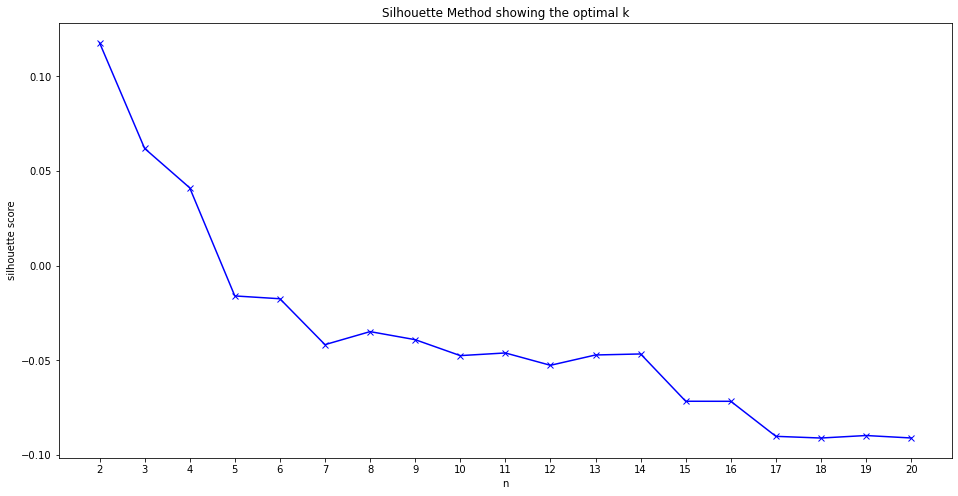

In [7]:
fig, ax = plt.subplots(1,figsize=(16,8))
ax.plot(N, silhouette, 'bx-')
ax.set_xlabel('n')
ax.set_ylabel('silhouette score')
ax.set_xticks(np.arange(min(N), max(N)+1, 1.0))
ax.set_title('Silhouette Method showing the optimal k')

In [8]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [9]:
gmm_6 = load("./models/gmm_6.pickle")
clusters_6 = gmm_6.predict(x__norm)
pd.Series(clusters_6).value_counts().sort_index()

0    357
1    592
2    243
3    366
4    418
5    338
dtype: int64

In [10]:
gmm_9 = load("./models/gmm_9.pickle")
clusters_9 = gmm_9.predict(x__norm)
pd.Series(clusters_9).value_counts().sort_index()

0     69
1    495
2    164
3    199
4    245
5    111
6    450
7    207
8    374
dtype: int64

In [11]:
gmm_13 = load("./models/gmm_13.pickle")
clusters_13 = gmm_13.predict(x__norm)
pd.Series(clusters_13).value_counts().sort_index()

0     391
1     356
2      58
3      38
4     110
5     116
6     167
7     170
8     215
9     262
10    231
11    135
12     65
dtype: int64

In [12]:
songs_df["cluster_6"] = clusters_6
songs_df["cluster_9"] = clusters_9
songs_df["cluster_13"] = clusters_13
songs_df

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label,cluster_6,cluster_9,cluster_13
0,Super Freaky Girl,Nicki Minaj,0.950,0.891,-2.653,0.2410,0.06450,0.000018,0.3090,0.912,133.010,4C6Uex2ILwJi9sZXRdmqXp,170977,H,5,8,8
1,As It Was,Harry Styles,0.520,0.731,-5.338,0.0557,0.34200,0.001010,0.3110,0.662,173.930,4LRPiXqCikLlN15c3yImP7,167303,H,1,8,10
2,About Damn Time,Lizzo,0.836,0.743,-6.305,0.0656,0.09950,0.000000,0.3350,0.722,108.966,1PckUlxKqWQs3RlWXVBLw3,191822,H,5,8,8
3,Break My Soul,Beyonce,0.687,0.887,-5.040,0.0826,0.05750,0.000002,0.2700,0.853,114.941,2KukL7UlQ8TdvpaA7bY3ZJ,278282,H,5,8,8
4,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,-11.903,0.0596,0.65900,0.002660,0.0546,0.139,108.296,29d0nY7TzCoi22XBqDQkiP,300840,H,1,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,You And Me Jesus,Jake Hess,0.725,0.183,-20.140,0.0428,0.81800,0.000000,0.1090,0.510,116.026,758hjU9V1HnECTxhqgCbVJ,204000,R,1,1,0
2310,I Knew I Loved You,Savage Garden,0.610,0.497,-9.880,0.0279,0.32000,0.000061,0.0884,0.739,85.031,6nozDLxeL0TE4MS9GqYU1v,250360,R,1,1,0
2311,Your Mother Should Have Told You,Robert Palmer,0.474,0.965,-8.327,0.0493,0.03850,0.002880,0.1710,0.544,159.875,2CqXrDR4wIr2K4rh4LfbA6,221427,R,1,3,9
2312,Where Is Everybody?,Nine Inch Nails,0.625,0.767,-5.753,0.0477,0.00166,0.000789,0.0900,0.792,144.013,3igeWkfoyimX5hfD3DbpER,340200,R,4,6,1


In [13]:
songs_df[songs_df['cluster_9'] == 2]

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,song_label,cluster_6,cluster_9,cluster_13
33,Provenza,Karol G,0.870,0.5160,-8.006,0.0541,0.6560,0.00823,0.1100,0.5300,111.005,7dSZ6zGTQx66c2GF91xCrb,210200,H,2,2,11
78,Rollercoaster Ride,The Whitest Boy Alive,0.753,0.3040,-9.859,0.0516,0.5920,0.07800,0.1080,0.3770,75.520,7hejG1JwFh3NsfUze7KaJ9,159880,R,3,2,11
91,Come Back To Me,Janet Jackson,0.428,0.4090,-12.346,0.0271,0.6260,0.00961,0.1380,0.0611,77.906,0NSSqYISjnav81CEn6EgBY,332742,R,3,2,6
118,Besame Mucho,Andrea Bocelli,0.521,0.5020,-8.521,0.0287,0.8860,0.02000,0.1880,0.3780,95.028,5WHnE8MsLFHqSUwecrs7WO,241232,R,3,2,6
150,Awake,Angels Of Light & Akron/Family,0.382,0.0365,-18.340,0.0367,0.9610,0.07040,0.1140,0.0398,128.321,7dQHGCyBqtNJtOm6TvZT7i,150333,R,3,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,Biscuit,Portishead,0.737,0.4550,-7.997,0.0805,0.7300,0.05500,0.0717,0.3390,136.030,6dDcfbMUFkFDk6x93kITY7,302600,R,3,2,11
2289,Such Great Heights,The Postal Service,0.644,0.8080,-7.268,0.0513,0.0467,0.18700,0.0652,0.1750,174.980,4G21jWo0Cm6lOIUNnZ2mUI,266507,R,0,2,5
2296,One Day I\'ll Fly Away,Randy Crawford,0.489,0.3580,-10.413,0.0302,0.7610,0.01800,0.1060,0.4220,77.784,0J8A1ZVyJcRZxFNvtp6jRh,298027,R,3,2,6
2298,Just Got To Be,The Black Keys,0.329,0.6120,-8.500,0.0720,0.6910,0.00486,0.1260,0.6860,172.023,0WyD0V9Mf8aILlexKswK4w,180160,R,2,2,10
